In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from itertools import combinations
from scipy import stats as st
import numpy as np
from numpy import argmax

In [2]:
# Machine learning model libraries 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

In [3]:
# Import Dataset
df = pd.read_csv("../Resources/sb_champion_stats.csv", index_col = 1)
df.head()

,Unnamed: 0,total_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,fumbles_lost_fum,td_passes_pass,ints_pass,sacks_pass,...,year,team,fg_success_rate,extra_success_rate,pass_success_rate,avg_yards_pass,avg_yards_rush,kicks_blocked,passes_per_rushing_plays,Champion
team_year,,,,,,,,,,,,,,,,,,,,,
arizona_cardinals_2001,0,670,5,0,29,13,7.0,0.0,0.0,0.0,...,2001,arizona_cardinals,0.833333,1.0,0.000000,10.715232,3.546939,0.0,0.004082,0.0
arizona_cardinals_2002,1,547,12,0,24,7,1.0,0.0,2.0,5.0,...,2002,arizona_cardinals,0.000000,0.0,0.388889,11.470588,4.256410,0.0,0.461538,0.0
arizona_cardinals_2003,2,548,15,0,35,8,7.0,5.0,7.0,25.0,...,2003,arizona_cardinals,0.750000,1.0,0.568862,12.957831,4.943396,0.0,3.150943,0.0
arizona_cardinals_2004,3,511,16,0,43,7,7.0,13.0,18.0,39.0,...,2004,arizona_cardinals,0.758621,1.0,0.560150,11.369231,3.585034,0.0,3.619048,0.0
arizona_cardinals_2005,4,483,19,0,27,9,11.0,21.0,21.0,45.0,...,2005,arizona_cardinals,0.955556,1.0,0.625373,12.421053,3.541436,0.0,3.701657,0.0


In [4]:
# Print all column names:
for col in df.columns:
    print(col)

Unnamed: 0
total_tackles_def
sacks_def
safties_def
passes_defended_def
ints_def
fumbles_lost_fum
td_passes_pass
ints_pass
sacks_pass
receiving_tds_rec
rushing_tds_rush
year
team
fg_success_rate
extra_success_rate
pass_success_rate
avg_yards_pass
avg_yards_rush
kicks_blocked
passes_per_rushing_plays
Champion


In [5]:
# Keep only columns related to offensive statistics
X_off = df[["fumbles_lost_fum", "td_passes_pass", "ints_pass", "sacks_pass", "receiving_tds_rec",
           "rushing_tds_rush", "pass_success_rate", "avg_yards_pass", "avg_yards_rush", "passes_per_rushing_plays"]]
X_off.shape

(511, 10)

# Scaling Offensive Features

In [6]:
# Generate Scaler instance and scale the data
X_off_scaled = StandardScaler().fit_transform(X_off)

# Principal Component Analysis

In [7]:
# Instantiate PCA
pca = PCA(n_components = 10)

# Extract from offensive features to 10 components
X_off_pca = pca.fit_transform(X_off_scaled)

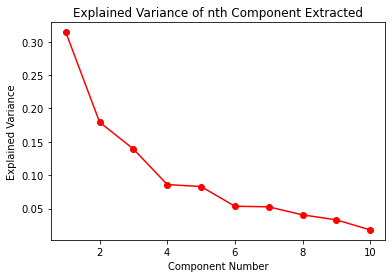

In [8]:
plt.plot(np.arange(pca.n_components_)+1 , pca.explained_variance_ratio_, 'o-', color = "red")
plt.title("Explained Variance of nth Component Extracted")
plt.xlabel("Component Number")
plt.ylabel("Explained Variance")
plt.show()
plt.close()

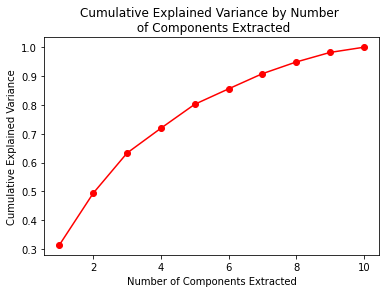

In [9]:
plt.plot(np.arange(pca.n_components_)+1 , pca.explained_variance_ratio_.cumsum(), 'o-', color = "red")
plt.title("Cumulative Explained Variance by Number \n of Components Extracted")
plt.xlabel("Number of Components Extracted")
plt.ylabel("Cumulative Explained Variance")
plt.show()
plt.close()